In [ ]:
import os

# Ignore numpy warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%matplotlib notebook

# Use seaborn settings.
import seaborn as sns
sns.set(
        #context="paper",
        context="talk",
        #context="poster",
        style='darkgrid',
        #style="dark",
        #palette='deep',
        font='sans-serif', 
        #font_scale=1.0, 
        #color_codes=False, 
        rc={'figure.figsize': (12, 8.0)}, # width and height in inches.
        #rc={'figure.figsize': (12, 12.0)}, # width and height in inches.
)

import IPython

def _embed(src, width="800", height="400"):
    return IPython.display.IFrame(src=src, width=str(width), height=str(height))

from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def embed(line):
    "my line magic"
    #return line
    return _embed(line)

# We delete these to avoid name conflicts for automagic to work
del embed
#del lcmagic

# Theme
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

from abipy import abilab
import abipy.data as abidata
abiopen = abilab.abiopen

si_pseudo = os.path.join(abidata.pseudo_dir, "14si.pspnc")

# New features of AbiPy v0.7

### M. Giantomassi and the AbiPy group

9th international ABINIT developer workshop<br> 
<small>20-22nd May 2019 - Louvain-la-Neuve, Belgium</small>

<!-- link rel="stylesheet" href="reveal.js/css/theme/sky.css" id="theme" -->
<img src="./assets/intro_logos.png" width="85%" heigh="15%" align="center">
<hr> 

* These slides have been generated using [jupyter](https://jupyter.org), [nbconvert](https://github.com/jupyter/nbconvert) and [revealjs](https://revealjs.com/)
* The notebook can be downloaded from this [github repo](https://github.com/gmatteo/abipy_intro_abidev2019)
* To install and configure the software, follow these [installation instructions](https://github.com/abinit/abipy#getting-abipy)

Use the Space key to navigate through all slides.

<img src="./assets/abipy_logo.jpg" width="55%" align="center">

## What is AbiPy?

#### Python package for:

   * Generating ABINIT input files automatically
   * Post-processing output results (*netcdf* and *text* files)
   * Interfacing ABINIT with external tools (e.g. [Vesta](http://jp-minerals.org/vesta/en/))
   * Creating and executing workflows (band structures, DFPT, $GW$, BSE…)

#### Why python?

   * Easy to use and to learn
   * Great support for science ([numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) …)
   * Interactive environments ([ipython](http://ipython.org/), [jupyter notebooks](https://jupyter.org/), GUIs)
   * More powerful and flexible than Fortran for implementing the high-level logic needed in modern ab-initio workflows
   * [pymatgen](https://github.com/materialsproject) ecosystem and the [materials project database](https://www.materialsproject.org/)…

## How to install AbiPy

<!-- From the most simple to the most complex one, you have three options:-->

Using [pip](https://pypi.org/project/pip/) and python wheels:

        pip install abipy --user

Using [conda](https://conda.io/en/latest/) (*recommended*):

        conda install abipy --channel abinit 

From the [github repository](https://github.com/abinit/abipy) (*develop mode*):

        git clone https://github.com/abinit/abipy.git
        cd abipy 
        python setup.py develop
    
<!--
https://pypi.org/project/abipy/
https://anaconda.org/abinit/abipy
-->

<hr>

For further info see http://abinit.github.io/abipy/installation.html

## AbiPy documentation with galleries of matplotlib examples and workflows

<!--
* http://abinit.github.io/abipy/index.html

* Jupyter notebooks 
* Gallery of matplotlib examples and flows
* abitutorial github repo with additional example

<img src="./assets/abipy_doc_homepage.png" width="100%" align="center">
-->

In [ ]:
%embed https://abinit.github.io/abipy/index.html

##  Jupyter notebooks with [examples and lessons](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb) inspired by the official tutorials

<!-- img src="./assets/abipy_notebooks.png" width="100%" align="center" -->

In [ ]:
%embed https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb

<img src="./assets/Data-Analysis.jpg" width="95%" align="center">

* Since AbiPy is not restricted to high-throughput, we'll show how to use the <u>terminal</u> to analyze calculations

* Well, a python script would be much more flexible but the goal here is to show 
  that one can replace *grep*, *vim*, *gnuplot* with AbiPy

<div class="alert alert-warning">
No perl scripts were harmed in the making of this notebook
</div>

## Command line interface

* *abiopen.py* ➝ Open output files inside *ipython* or print/visualize file
* *abistruct.py* ➝ Operate on crystalline structures read from file
* *abicomp.py* ➝ Compare multiple files (i.e. convergence studies)
* *abiview.py* ➝ Quick visualization of output files
* *abinp.py* ➝ Generate input files for typical calculations
    
### Documentation 

* `abistruct.py --help` for manpage
* `abistruct.py COMMAND --help` for help about `COMMAND`
<hr>
HTML documentation available at http://abinit.github.io/abipy/scripts/index.html

### Examples
<p></p>

```shell
abistruct.py spglib si_scf_GSR.nc
abistruct.py convert si_scf_GSR.nc -f cif
abiopen.py si_scf_GSR.nc --print
```

### and many more...

In [22]:
gsr = abiopen("si_nscf_GSR.nc")
gsr.ebands.plotly(with_gaps=True);

In [23]:
abilab.abipanel()
gsr.get_panel()

Tabs
    [0] Row
        [0] Bokeh(PreText)
    [1] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Column
                [0] Checkbox(name='show gaps')
                [1] Checkbox(name='Set Fermie to VBM')
                [2] Button(button_type='primary', name='Plot e-bands')
            [2] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] ParamMethod(method)
    [2] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(options=['jsmol', 'vesta', ...], value='vesta')
            [2] Button(button_type='primary', name='View structure')
            [3] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] Column
            [0] Column(sizing_mode='stretch_width')
                [0] MyMarkdown(str)
                [1] Column(sizing_mode='stretch_width')
                    [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=              ...)
                    [1] Divider()
                [2] MyMarkdown(str)
                [3] Column(sizing_mode='stretch_width')
                    [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=              ...)
                    [1] Divider()
                [4] MyMarkdown(str)
                [5] Column(sizing_mode='stretch_width')
                    [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=              ...)
                    [1] Divider()
                [6] Accordion(sizing_mode='stretch_width')
                    [0] Column(sizing_mode='stretch_width')
                        [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=   idx         frac_coords...)
                        [1] Divider()
            [1] ParamMethod(method)

In [24]:
gsr.structure.get_panel()

Tabs
    [0] Row
        [0] Bokeh(PreText)
    [1] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] FloatInput(name='symprec', start=0.0, step=0.01, value=0.01)
            [2] FloatInput(name='angtol', start=0.0, step=1, value=5)
            [3] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] ParamMethod(method)
    [2] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='format', options=['abinit', 'siesta', ...], value='abinit')
            [2] IntInput(name='line density', start=0, step=5, value=10)
            [3] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] ParamMethod(method)
    [3] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='format', options=['abinit', 'cif', ...], value='abinit')
            [2] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] ParamMethod(method)
    [4] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(options=['jsmol', 'vesta', ...], value='vesta')
            [2] Button(button_type='primary', name='View structure')
            [3] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] Column
            [0] Column(sizing_mode='stretch_width')
                [0] MyMarkdown(str)
                [1] Column(sizing_mode='stretch_width')
                    [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=              ...)
                    [1] Divider()
                [2] MyMarkdown(str)
                [3] Column(sizing_mode='stretch_width')
                    [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=              ...)
                    [1] Divider()
                [4] MyMarkdown(str)
                [5] Column(sizing_mode='stretch_width')
                    [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=              ...)
                    [1] Divider()
                [6] Accordion(sizing_mode='stretch_width')
                    [0] Column(sizing_mode='stretch_width')
                        [0] DataFrame(disabled=True, sizing_mode='stretch_width', value=   idx         frac_coords...)
                        [1] Divider()
            [1] ParamMethod(method)
    [5] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='GS type', options=['scf', 'relax'], value='scf')
            [2] Select(name='SpinMode', options=['unpolarized', ...], value='unpolarized')
            [3] IntInput(name='kppra', start=0, step=1000, value=1000)
            [4] Button(button_type='primary', name='Generate input')
            [5] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str)
        [1] ParamMethod(method)
    [6] Row
        [0] Column
            [0] Button(button_type='primary', name='Connect to Materials P...)
        [1] ParamMethod(method)

In [25]:
#gsr.ebands.plotly_ebands_with_edos("si_scf_GSR.nc", with_gaps=True)

#### Print results stored in FILE  (more than 45 file extensions supported)

In [8]:
ddb = abilab.abiopen("ZnSe_hex_qpt_DDB")

In [9]:
abilab.abipanel()
ddb.get_panel()

Tabs
    [0] Row
        [0] Bokeh(PreText)
    [1] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] IntInput(name='Nqsmall', start=1, value=10)
            [2] IntInput(name='ndivsm', start=1, value=5)
            [3] Select(name='Asr', options=OrderedDict([('0', ...]), value=2)
            [4] Select(name='Chneut', options=OrderedDict([('0', ...]), value=1)
            [5] Select(name='Dipdip', options=OrderedDict([('0', ...]), value=1)
            [6] Select(name='Lo to splitting', options=OrderedDict([('automatic',...]), value='automatic')
            [7] Select(name='Dos method', options=OrderedDict([('tetra', ...]), value='tetra')
            [8] Toggle(name='Stacked PJDOS', value=True)
            [9] RangeSlider(end=1000, name='T-range', step=20, value=(0.0, 300.0))
            [10] Button(button_type='primary', name='Plot Bands and DOS')
            [11] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str, name='warning')
        [1] ParamMethod(method)
    [2] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='Asr', options=OrderedDict([('0', ...]), value=2)
            [2] Select(name='Chneut', options=OrderedDict([('0', ...]), value=1)
            [3] Select(name='Dipdip', options=OrderedDict([('0', ...]), value=1)
            [4] FloatInput(name='Gamma ev', start=1e-20, value=0.0001)
            [5] Button(button_type='primary', name='Compute')
            [6] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str, name='warning')
        [1] ParamMethod(method)
    [3] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='Asr', options=OrderedDict([('0', ...]), value=2)
            [2] Select(name='Chneut', options=OrderedDict([('0', ...]), value=1)
            [3] Select(name='Dipdip', options=OrderedDict([('0', ...]), value=1)
            [4] FloatInput(name='Gamma ev', start=1e-20, value=0.0001)
            [5] RangeSlider(name='Frequency range (eV)', step=0.001, value=(0.0, 0.1))
            [6] Button(button_type='primary', name='Plot eps0(omega)')
            [7] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str, name='warning')
        [1] ParamMethod(method)
    [4] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='Asr', options=OrderedDict([('0', ...]), value=2)
            [2] Select(name='Chneut', options=OrderedDict([('0', ...]), value=1)
            [3] Select(name='Dipdip', options=OrderedDict([('0', ...]), value=1)
            [4] Button(button_type='primary', name='Calculate speed o...)
            [5] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str, name='warning')
        [1] ParamMethod(method)
    [5] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] IntInput(name='Nqsmall', start=1, value=10)
            [2] IntInput(name='ndivsm', start=1, value=5)
            [3] Select(name='Dos method', options=OrderedDict([('tetra', ...]), value='tetra')
            [4] Button(button_type='primary', name='Compute phonons w...)
            [5] Column
                [0] Divider()
                [1] Accordion
                    [0] Markdown(str)
                    [1] Markdown(str, name='warning')
        [1] ParamMethod(method)
    [6] Row
        [0] Column
            [0] MyMarkdown(str)
            [1] Select(name='Asr', options=OrderedDict([('0', ...]), value=2)
            [2] Select(name='Chneut', options=OrderedDict([('0', ...]), value=1)
            [3] Select(name='Dipdip', options=OrderedDict([('0', ...]), value=1)
            [4] Select(name='Dos method', options=OrderedDict([('tetra', ...]), value

#### To produce a predefined set of matplotlib figures, use:
<p></p>

```shell
abiopen.py mgb2_kpath_FATBANDS.nc --expose --seaborn
```    

<img src="assets/mgb2_fatbands.png" width="100%" align="center" alt="abiopen_expose">

#### Replace *--expose* with *--notebook* to generate a jupyter notebook with predefined python code

#### *abiopen.py* supports output files (note *abo* extension):

In [10]:
!abiopen.py gs_dfpt.abo -p 

Traceback (most recent call last):
  File "/Users/gmatteo/miniconda3/envs/env3.8/bin/abiopen.py", line 7, in <module>
    exec(compile(f.read(), __file__, 'exec'))
  File "/Users/gmatteo/git_repos/abipy/abipy/scripts/abiopen.py", line 339, in <module>
    sys.exit(main())
  File "/Users/gmatteo/miniconda3/envs/env3.8/lib/python3.8/site-packages/monty-2021.3.3-py3.8.egg/monty/functools.py", line 405, in wrapper
    sys.exit(main())
  File "/Users/gmatteo/git_repos/abipy/abipy/scripts/abiopen.py", line 206, in main
    raise RuntimeError("%s: no such file" % options.filepath)
RuntimeError: gs_dfpt.abo: no such file


#### and log files as well:

In [11]:
!abiopen.py run.log -p 

Traceback (most recent call last):
  File "/Users/gmatteo/miniconda3/envs/env3.8/bin/abiopen.py", line 7, in <module>
    exec(compile(f.read(), __file__, 'exec'))
  File "/Users/gmatteo/git_repos/abipy/abipy/scripts/abiopen.py", line 339, in <module>
    sys.exit(main())
  File "/Users/gmatteo/miniconda3/envs/env3.8/lib/python3.8/site-packages/monty-2021.3.3-py3.8.egg/monty/functools.py", line 405, in wrapper
    sys.exit(main())
  File "/Users/gmatteo/git_repos/abipy/abipy/scripts/abiopen.py", line 206, in main
    raise RuntimeError("%s: no such file" % options.filepath)
RuntimeError: run.log: no such file


#### If you are still using perl scripts to extract data from the main output file, check this out:
<p></p>

```sh
abiopen.py gs_dfpt.abo --expose --seaborn
```

<center>
<img src="assets/abiopen_abo.png" width="75%" align="center">
</center>

#### The introduction of Yaml documents in the main output (*cfr.* Theo's talk) will facilitate the implementation of new post-processing tools...

<img src="assets/abistruct.png" width="35%" align="center">

#### It works with any file providing a structure object (*.nc*, .abi, *.cif* …) 

#### Convert structure from netcdf format to CIF (*abivars*, *xsf*, *poscar*,  *qe*,  *siesta*,  *wannier90*,  *json*)

In [12]:
!abistruct.py convert si_scf_GSR.nc -f cif

# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.88829233
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si0  1  0.00000000  0.00000000  0.00000000  1
  Si  Si1  1  0.25000000  0.25000000  0.25000000  1



#### Are you still using *cut3d* to export the structure in a format that other applications can understand?
<p></p>


```sh
abistruct.py visualize run_si02.abi
```

<img src="assets/sio2_vesta.png" width="75%" align="center">

#### Supports also *ovito*, *xcrysden*, *vtk*, *mayavi*, *matplotlib*  (Use *--application* option)

#### Read structure from FILE and print ABINIT variables for NSCF along k-path:

In [13]:
!abistruct.py kpath si_scf_GSR.nc

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/kpath.py:179: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warn(
# Abinit Structure
 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005521    0.0000000000    3.6537614973
    2.1095001840    5.9665675402    3.6537614973
    0.0000000000    0.0000000000    7.3075229946

# tolwfr 1e-20 iscf -2 # NSCF run
# To read previous DEN file, use: getden -1 or specify filename via getden_path "out_DEN"

# K-path in reduced coordinates:
 ndivsm 10
 kptopt -11
 kptbounds
    +0.00000  +0.00000  +0.00000  # $\Gamma$
    +0.50000  +0.00000  +0.50000  # X
    +0.50000  +0.25000  +0.75000  # W
    +0.37500  +0.37500  +0.75000  # K
    +0.00000  +0.00000  +0.00000  # $\Gamma$
    +0.50000  +0.50000  +0.50000  # L
    +0.62500  +0

#### Want to know what's happening in the structural relaxation?
<p></p>

```sh
abiview.py hist sic_relax_HIST.nc
```

<center>
<img src="assets/abiview_hist.png" width="60%" align="center">
</center>

#### Want a GUI? 

Use *--appname* for app in [avogadro, ovito, v_sim, vesta, xcrysden, mpl, mayavi, vtk]

#### Need to call *anaddb* to compute and visualize ph-bands and DOS from DDB?
<p></p>

```sh
abiview.py ddb ZnSe_hex_qpt_DDB --seaborn
```

<img src="assets/abicomp.png" width="30%" align="center">

## Abipy Robots

* High-level interface to operate on <u>multiple files</u> with the same file extension

* Useful for:

     * convergence studies
     * producing multiple plots
     * building [Pandas dataframes](https://pandas.pydata.org/) (data in tabular format powered by python)

* Each *Robot* is associated to a file extension, *e.g.* 

     * GSR.nc ➝ *GsrRobot*
     * DDB ➝ *DdbRobot*
     
* *Robots* can be constructed from:

    1. List of filenames
    2. Directories and regular expressions
    
* Command line interface provided by the *abicomp.py* script:

* To generate notebook to compare multiple *GSR* files, use:

            abicomp.py gsr out1_GSR.nc  out2_GSR.nc --notebook

#### To compare multiple structures:

In [14]:
!abicomp.py structure *.cif si_nscf_GSR.nc `find . -name *_DDB`

zsh:1: no matches found: *.cif


#### Note shell wildcard characters and Unix `find` inside backticks (bash rocks!)

In [15]:
#plotter = abilab.ElectronBandsPlotter()
#plotter.add_ebands(label="BZ sampling", bands="si_scf_GSR.nc")
#plotter.add_ebands(label="k-path", bands="si_nscf_GSR.nc")
#plotter.gridplot(with_gaps=True);

#### Using *ElectronBandsPlotter* to visualize multiple band structures:
<p></p>

```sh
abicomp.py ebands *_GSR.nc
```

<p></p>

<img src="assets/abicomp_ebands.png" width="85%" align="center">

#### Pandas dataframe printed to terminal:

```text
               nsppol  nspinor  nspden  nkpt  nband  nelect    fermie  \
si_nscf_GSR.nc       1        1       1    14      8     8.0  5.598453
si_scf_GSR.nc        1        1       1    29      8     8.0  5.598453

               formula  natom  alpha  beta  gamma         a         b  \
si_nscf_GSR.nc     Si2      2   60.0  60.0   60.0  3.866975  3.866975
si_scf_GSR.nc      Si2      2   60.0  60.0   60.0  3.866975  3.866975

                       c     volume abispg_num spglib_symb  spglib_num  \
si_nscf_GSR.nc  3.866975  40.888292        227       Fd-3m         227
si_scf_GSR.nc   3.866975  40.888292        227       Fd-3m         227

               spglib_lattice_type scheme  occopt  tsmear_ev  bandwidth_spin0  \
si_nscf_GSR.nc               cubic   none       1   0.272114        11.855854
si_scf_GSR.nc                cubic   none       1   0.272114        11.855874

                fundgap_spin0  dirgap_spin0  gap_type  \
si_nscf_GSR.nc       0.524340      2.531828  indirect
si_scf_GSR.nc        0.562277      2.531798  indirect

                                   fundgap_kstart              fundgap_kend  \
si_nscf_GSR.nc  [+0.000, +0.000, +0.000] $\Gamma$  [+0.000, +0.429, +0.429]
si_scf_GSR.nc            [+0.000, +0.000, +0.000]  [+0.375, +0.375, +0.000]

                                    dirgap_kstart  \
si_nscf_GSR.nc  [+0.000, +0.000, +0.000] $\Gamma$
si_scf_GSR.nc            [+0.000, +0.000, +0.000]

                                      dirgap_kend
si_nscf_GSR.nc  [+0.000, +0.000, +0.000] $\Gamma$
si_scf_GSR.nc            [+0.000, +0.000, +0.000]
```

## Bash is handy but python is more flexible

##### Let's use the *DdbRobot* to compare phonons obtained with different ${\bf k}$-meshes and smearing values:

In [16]:
paths = [
    "mgb2_888k_0.01tsmear_DDB",
    "mgb2_888k_0.04tsmear_DDB",
    "mgb2_121212k_0.01tsmear_DDB",
    "mgb2_121212k_0.04tsmear_DDB",
]

paths = [os.path.join(abidata.dirpath, "refs", "mgb2_phonons_nkpt_tsmear", f) 
         for f in paths]

robot = abilab.DdbRobot()
for i, path in enumerate(paths):
    robot.add_file(path, path)

In [17]:
# Define function to change labels:
func = lambda ddb: "nkpt: %s, tsmear: %.2f" % (
    ddb.header["nkpt"], ddb.header["tsmear"])

robot.remap_labels(func)
robot

Label                    Relpath
-----------------------  -----------------------------------------------------------------------------
nkpt: 256, tsmear: 0.01  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.01tsmear_DDB
nkpt: 256, tsmear: 0.04  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.04tsmear_DDB
nkpt: 864, tsmear: 0.01  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.01tsmear_DDB
nkpt: 864, tsmear: 0.04  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.04tsmear_DDB

<!-- We are usually interested in the convergence behavior with respect to one or two parameters of 
the calculations.-->

#### Now we can build a dataframe with the most important parameters:

In [18]:
robot.get_params_dataframe()

,nkpt,nsppol,ecut,tsmear,occopt,ixc,nband,usepaw
"nkpt: 256, tsmear: 0.01",256,1,35.0,0.01,4,1,8,0
"nkpt: 256, tsmear: 0.04",256,1,35.0,0.04,4,1,8,0
"nkpt: 864, tsmear: 0.01",864,1,35.0,0.01,4,1,8,0
"nkpt: 864, tsmear: 0.04",864,1,35.0,0.04,4,1,8,0


#### and check that all DDBs have been computed with the same crystalline structure:

In [19]:
robot.get_lattice_dataframe()

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,spglib_symb,spglib_num,spglib_lattice_type
"nkpt: 256, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 256, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal


* Dataframes can be exported to different formats: CSV, $Latex$, JSON, Excel, ...
* Use [dataframe.to_clipboard()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_clipboard.html#pandas-dataframe-to-clipboard) 
to copy to clipboard and paste into spreadsheet editor
* Explore your *DataFrames* inside *jupyter* with [qgrid](https://github.com/quantopian/qgrid)
* High-level plotting interface provided by [seaborn](https://seaborn.pydata.org/)
<p></p>

```python
energy_table.plot(x="nkpt", y=["energy_Ha", "ediff_Ha", "pressure"], 
                  style="-o", subplots=True);
```

#### To analyze the effect of k-sampling/smearing on the vibrational properties:

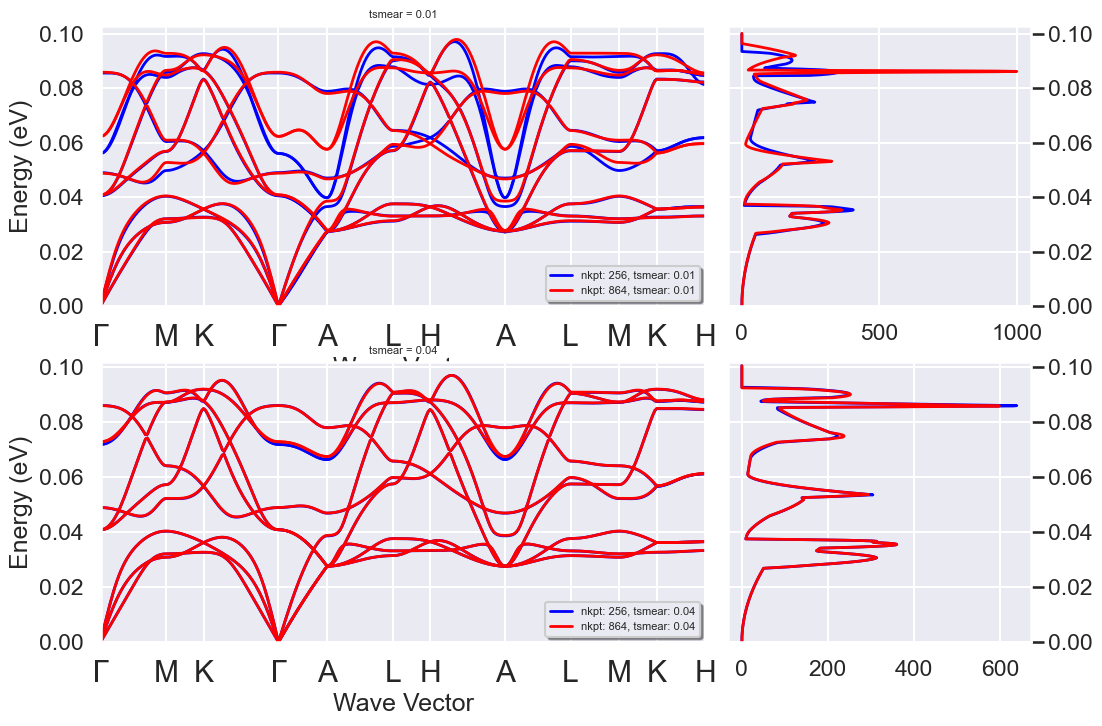

In [20]:
# Invoke anaddb and store results
r = robot.anaget_phonon_plotters(nqsmall=2)

r.phbands_plotter.gridplot_with_hue("tsmear", with_dos=True);

## *AbinitInput* object 

Programmatic interface to generate input files:

* *Dict-like* object storing ABINIT variables 
* Methods to set multiple variables (*e.g.* **k**-path from *structure*)
* Factory functions to generate input files with minimal effort

Can invoke ABINIT to get important parameters such as:

  * list of **k**-points in the IBZ
  * list of irreducible DFPT perturbations
  * list of possible configurations for MPI jobs (*npkpt*, *npfft*, *npband* …)
     
#### To build an input, we need a *structure* and a list of *pseudos*:

### Input file for band structure calculation + DOS

1. GS run to get the density 
2. NSCF run along high-symmetry **k**-path
3. NSCF run with **k**-mesh to compute the DOS

In [21]:
multi = abilab.ebands_input(structure="si.cif", 
                            pseudos="14si.pspnc",
                            ecut=8, 
                            spin_mode="unpolarized", 
                            smearing=None, 
                            dos_kppa=5000)

multi.get_vars_dataframe("kptopt", "iscf", "ngkpt")

FileNotFoundError: [Errno 2] No such file or directory: 'si.cif'

#### To build an input for SCF+NSCF run with (relaxed) structure from the materials project database:
<p></p>

        abinp.py ebands mp-149          

## Future developments

### Post-processing tools

* Support for more *netcdf* files
* More post-processing tools for MD calculations
* More converters and interfaces for third-party applications
* Integrate AbiPy with [jupyterlab](https://github.com/jupyterlab/jupyterlab) to create a flexible graphical enviroment for Abinit exposing (part) 
  of the python API 
* Explore web-based technologies for data analysis and visualization ([plotly](https://plot.ly/), [dash](https://plot.ly/products/dash/)) 
* Develop toolkit to build web apps powered by AbiPy and pymatgen to disseminate scientific results. 

## Continuous Integration

* Use AbiPy programmatic interface to implement:

    * Validation of parallel algorithms for np in range(1, N)
    * Stress testing
    * Benchmarks